## IMPORT MODULES

In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

## CREATE SOME DATA

UNKNOWN PARAMETERS

$\mu$ - Mixture means,
$\pi$ - Mixture weights



KNOWN PARAMETERS

$\sigma$ - Standard deviation for diagonal covariance matrix,
$n$ - number of observations in dataset

In [3]:
modelParameters = {'mu':[[-2,1], [0.5, -1], [0,1]],
                   'pi':[0.2, 0.35, 0.45],
                   'sigma':0.4,
                   'n':200} 

#Check that pi sums to 1

if np.sum(modelParameters['pi']) != 1:
    print('Mixture weights must sum to 1!')
    
data = []

#determine which mixture each point belongs to

def generateLabels(n, pi):
    #Generate n realisations of a categorical distribution given the parameters pi
    unif = np.random.uniform(size = n) #Generate uniform random variables
    labels = [(u < np.cumsum(pi)).argmax() for u in unif] #assign cluster
    return labels

#Given the labels, generate from the corresponding normal distribution

def generateMixture(labels, params):
        
    normalSamples = []
    for label in labels:
        
        #Select Parameters
        mu = params['mu'][label]
        Sigma = np.diag([params['sigma']**2]*len(mu))
        
        
        #sample from multivariate normal
        samp = np.random.multivariate_normal(mean = mu, cov = Sigma, size = 1)
        normalSamples.append(samp)
        
    normalSamples = np.reshape(normalSamples, (len(labels), len(params['mu'][0])))
        
    return normalSamples
        

In [12]:
labels = generateLabels(100, modelParameters['pi'])
X = generateMixture(labels, modelParameters)

## Visualise X


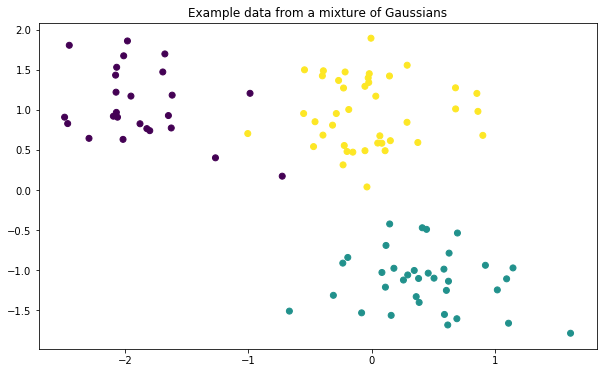

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c = labels)
plt.title('Example data from a mixture of Gaussians')
plt.show()

## Naive Bayes model for parameter estimation

In the Naive Bayes case, we know what the labels are and therefore maximum-likelihood estimation of the discrete and normal distribution parameters is simple

In [14]:
#Format data into a pandas dataframe
Xdict = {'labels':labels}

for i in range(X.shape[1]): 
    Xdict[f'X{i}'] = X[:,i]

Xdf = pd.DataFrame(Xdict)

In [15]:
Xdf.head()

,labels,X0,X1
0,0,-2.094717,0.920183
1,1,0.622184,-1.138762
2,0,-2.070413,0.968049
3,0,-0.725673,0.171886
4,2,0.048567,0.585150


In [16]:
#Maximum Likelihood Estimation of pi parameters
distinctLabels = Xdf['labels'].drop_duplicates()
labelCounts = Xdf['labels'].value_counts()

parameterEstimates = {'mu':{}, 'pi':{}}

for label in distinctLabels:
    
    #The estimated probability value for each cluster is the proportion of entries in 
    #the dataset with that label
    
    parameterEstimates['pi'][f'{label}'] = labelCounts[label]/Xdf['labels'].shape[0] 
    
    
    #Estimated mean of each cluster is the sample mean of the values in the dataset which belong to the cluster
    
    mu =[]
    
    for i in range(X.shape[1]):
        mu.append(Xdf.loc[Xdf['labels'] == label][f'X{i}'].mean())
    
    parameterEstimates['mu'][f'{label}'] = mu
    
    



In [17]:
print(parameterEstimates['pi'])
print(parameterEstimates['mu'])

{'0': 0.25, '1': 0.35, '2': 0.4}
{'0': [-1.8739723399158907, 1.066648845273105], '1': [0.4304806891834362, -1.126210162648994], '2': [-0.03028052853227266, 0.9608486181366572]}


### Now that we have an estimate for the model parameters, for a given datapoint we can predict which cluster it is most likely to belong to

For data point x, we compute pi_k * f(x|mu_k) for each k and assign x to the cluster which gave the highest value - that is, the cluster which the data point is most likely to originate from

In [18]:
def predictLabel(x, parameterEstimates, sigma = modelParameters['sigma']):
    #Given feature vector, assign the most likely label
    
    densities = []
    
    for label in parameterEstimates['pi'].keys():
        
        muk = parameterEstimates['mu'][label]
        density = parameterEstimates['pi'][label]*multivariate_normal.pdf(x, mean=muk, cov=np.diag([sigma**2]*len(muk)))
        
        densities.append(density)
        
        if density == max(densities):
            prediction = label
            
    return prediction

In [19]:
predictLabel(X[0], parameterEstimates)

'0'

In [20]:
NBassignedLabels = [predictLabel(x, parameterEstimates) for x in X]

In [29]:
#Now obtain decision boundaries
h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
xxr = xx.ravel()
yyr = yy.ravel()


In [35]:
ZGMM = np.array([int(predictLabel([xxr[i], yyr[i]], parameterEstimates)) for i in range(xxr.shape[0])])
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

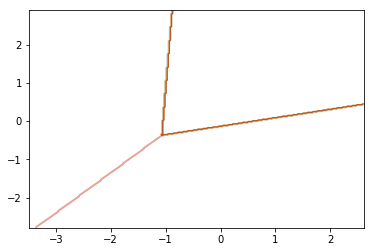

In [36]:
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [21]:
NBassignedLabels

['0',
 '1',
 '0',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '0',
 '0',
 '2',
 '0',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '0',
 '2',
 '1',
 '0',
 '0',
 '2',
 '2',
 '2',
 '0',
 '1',
 '2',
 '1',
 '2',
 '2',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '2',
 '1',
 '1',
 '2',
 '2',
 '1',
 '0',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2',
 '1',
 '0',
 '2',
 '1',
 '0',
 '1',
 '0',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '2',
 '0',
 '2',
 '2',
 '2',
 '1',
 '2',
 '0',
 '0',
 '2',
 '1',
 '2',
 '1',
 '1',
 '0']

## EM algorithm to estimate model parameters

In [164]:
#Initialise random values
muHat = np.reshape(np.random.uniform(size = np.array(modelParameters['mu']).size), np.array(modelParameters['mu']).shape)


unNormalisedPi = np.reshape(np.random.uniform(size = np.array(modelParameters['pi']).size), np.array(modelParameters['pi']).shape)
piHat = unNormalisedPi/(np.sum(unNormalisedPi)) #Initialise piHat with random values but it still needs to sum to 1

Q = np.zeros((X.shape[0], len(modelParameters['mu']))) #Pre-allocate Q with zeros


In [137]:
def calculateEStep(i,k,currentMu, currentPi, X, sigma):
    #Calculate the updated responsibility Q_{ik}
    pik = currentPi[k]
    muk = currentMu[k]
    xi = X[i]
    
    numerator = pik*multivariate_normal.pdf(xi, mean=muk, cov=np.diag([sigma**2]*len(muk)))
    denominator = np.sum([currentPi[k]*multivariate_normal.pdf(xi, mean=currentMu[k], cov=np.diag([sigma**2]*len(currentMu[k]))) for k in range(len(currentMu))])
    
    
    return numerator/denominator

def calculateMStep(Q, X):
    #X is an n x p data matrix
    #Q is the n x k responsibility matrix
    
    #want to return an updated mu (k x p matrix) and pi (k x 1 vector)
    pi = []
    mu = []
    
    
    for k in range(Q.shape[1]):
        pi.append(np.mean(Q[:,k]))
        
        muNumerator = np.zeros(X.shape[1])
        for i in range(X.shape[0]):
            muNumerator += Q[i,k]*X[i,:]
            
        muDenominator = np.sum(Q[:,k])
        mu.append(muNumerator/muDenominator)
        
    return np.array(mu), np.array(pi)
    

# Run Algorithm

In [168]:
updateChange = 100

while updateChange > 0.00001:
    
    #E-Step
    
    #Q is an n x k matrix
    for i in range(Q.shape[0]):
        for k in range(Q.shape[1]):
            Q[i,k] = calculateEStep(i,k, muHat, piHat, X, modelParameters['sigma'])
            
    
    #M-step
    muHatOld, piHatOld = muHat, piHat
    muHat, piHat = calculateMStep(Q,X)
    
    #Check for convergence
    
    #Concatenate together and take the two-norm
    muChange = np.linalg.norm((muHat-muHatOld).flatten())
    piChange = np.linalg.norm(piHat - piHatOld)
    updateChange = muChange + piChange
    

In [169]:
print(piHat)
print(muHat)


[0.41 0.36 0.23]
[[-6.64929854e-04  1.00704482e+00]
 [ 5.25703428e-01 -9.83118101e-01]
 [-2.01449608e+00  1.01134126e+00]]
0.0


In [161]:
print(modelParameters)

{'mu': [[-2, 1], [0.5, -1], [0, 1]], 'pi': [0.2, 0.35, 0.45], 'sigma': 0.1, 'n': 200}


In [84]:
class GaussianMixtureModel:
    
    def __init__(self, X, k, sigma):
        #X is the n x p dataframe
        #k is the number of gaussians in the mixture model
        #sigma is the (known) variance
        
        self.X = X
        self.k = k
        self.sigma = sigma
        
        #Initialise mu and pi values:
        self.mu = np.reshape(np.random.uniform(size = k*X.shape[1]), (k,X.shape[1]))
        
        unNormalisedPi = np.reshape(np.random.uniform(size = np.array(modelParameters['pi']).size), np.array(modelParameters['pi']).shape)
        self.pi = unNormalisedPi/(np.sum(unNormalisedPi)) #Has to sum to 1
        
        #Initialse Q with zeros:
        self.Q = np.zeros((X.shape[0], k))
        
    
    def calculateEStep(self, i,k,currentMu, currentPi, X, sigma):
        #Calculate the updated responsibility Q_{ik} using current mu and p value
        #Q_{ik} represents the probability that a the ith latent variable is k, conditional on the value of xi
        #Q can also be used to predict labels of specific points
        
        pik = currentPi[k]
        muk = currentMu[k]
        xi = X[i]

        numerator = pik*multivariate_normal.pdf(xi, mean=muk, cov=np.diag([sigma**2]*len(muk)))
        denominator = np.sum([currentPi[k]*multivariate_normal.pdf(xi, mean=currentMu[k], cov=np.diag([sigma**2]*len(currentMu[k]))) for k in range(len(currentMu))])


        return numerator/denominator

    def calculateMStep(self, Q, X):
        #X is an n x p data matrix
        #Q is the n x k responsibility matrix

        #want to return an updated mu (k x p matrix) and pi (k x 1 vector) using the responsibility matrix
        pi = []
        mu = []


        for k in range(Q.shape[1]):
            pi.append(np.mean(Q[:,k])) #Average of corresponding responsibilities

            muNumerator = np.zeros(X.shape[1])
            for i in range(X.shape[0]):
                muNumerator += Q[i,k]*X[i,:] #Weighted by responsibility

            muDenominator = np.sum(Q[:,k])
            mu.append(muNumerator/muDenominator)

        return np.array(mu), np.array(pi)
    
    
    def runEMAlgorithm(self, tolerance = 0.0001):
        
        updateChange = tolerance + 1
        
        while updateChange > tolerance: #change to while not converged later
    
            #E-Step

            #Q is an n x k matrix
            for i in range(self.Q.shape[0]):
                for k in range(self.Q.shape[1]):
                    self.Q[i,k] = self.calculateEStep(i,k, self.mu, self.pi, self.X, self.sigma)


            #M-step
            muOld, piOld = self.mu, self.pi
            self.mu, self.pi = self.calculateMStep(self.Q,self.X)

            #Check for convergence

            #Concatenate together and take the two-norm
            muChange = np.linalg.norm((self.mu-muOld).flatten())
            piChange = np.linalg.norm(self.pi - piOld)
            updateChange = muChange + piChange
            
        #Once the model has converged then the values of mu and pi are our estimates, based off the data
        
    
    def doLabelling(self):
        #Once we've run the EM algorithm, we can use the responsibilities to assign labels to each data point
        #We'll simply use an argmax scheme
    
        self.assignedLabels = np.argmax(self.Q, axis = 1)
        #NOTE: The label values might be different than the true labels if using a supervised models,
        #because the model has no notion of what those values are. For example, the model might have
        #labelled all of the '1's as '2's and vice versa - it is the way the input data is partitioned that is important
        
        #Also note that here we have thrown a great deal of information away. We had made an estimation as to the probability
        #that point i had label k, rather than simply assigning a label. Such probabilities can be useful in some cases 
        #the conditional distribution can readily be obtained by extracting the rows of self.Q
        
    def getProbabilitiesForSinglePoint(self,i):
        return self.Q[i,:]
    
    def labelNewDataPoint(self, x):
        densities = []
    
        for label in range(self.pi.shape[0]):

            muk = self.mu[label]
            density = self.pi[label]*multivariate_normal.pdf(x, mean=muk, cov=np.diag([self.sigma**2]*len(muk)))

            densities.append(density)

            if density == max(densities):
                prediction = label

        return prediction
    
    def saveIntermediateParams(self, tolerance =0.0001):
        updateChange = tolerance + 1
        self.MuStore = []
        self.PiStore = []
        self.QStore = []
        
        while updateChange > tolerance: #change to while not converged later
    
            #E-Step

            #Q is an n x k matrix
            for i in range(self.Q.shape[0]):
                for k in range(self.Q.shape[1]):
                    self.Q[i,k] = self.calculateEStep(i,k, self.mu, self.pi, self.X, self.sigma)


            #M-step
            muOld, piOld = self.mu, self.pi
            self.mu, self.pi = self.calculateMStep(self.Q,self.X)

            #Check for convergence

            #Concatenate together and take the two-norm
            muChange = np.linalg.norm((self.mu-muOld).flatten())
            piChange = np.linalg.norm(self.pi - piOld)
            updateChange = muChange + piChange
            
            #Store params
            self.MuStore.append(self.mu)
            self.PiStore.append(self.pi)
            self.QStore.append(self.Q)
            
        self.MuStore = np.array(self.MuStore)
        self.PiStore = np.array(self.PiStore)
        self.QStore = np.array(self.QStore)
        

In [85]:
GMM = GaussianMixtureModel(X, 3, modelParameters['sigma'])

In [63]:
GMM.runEMAlgorithm()

In [64]:
GMM.doLabelling()

In [80]:
GMM.labelNewDataPoint(X[0])

1

In [86]:
GMM.saveIntermediateParams()


In [89]:
GMM.Q = GMM.QStore[0]
GMM.doLabelling()

In [82]:
GMM.MuStore

array([[[ 0.02705362,  1.16132017],
        [-0.84506434,  0.77272476],
        [-0.05759208, -0.47585515]],

       [[ 0.11644725,  1.0999118 ],
        [-1.37356929,  0.99557931],
        [ 0.38536699, -0.99588953]],

       [[ 0.01788239,  0.97868533],
        [-1.7337898 ,  1.05036179],
        [ 0.42258983, -1.10675326]],

       [[-0.03163825,  0.95125319],
        [-1.89109125,  1.08700411],
        [ 0.42879437, -1.12224205]],

       [[-0.05017999,  0.94774744],
        [-1.92472439,  1.09588198],
        [ 0.42940523, -1.12372551]],

       [[-0.05536689,  0.94712349],
        [-1.93328283,  1.09814839],
        [ 0.42947773, -1.12389083]],

       [[-0.05672607,  0.94696233],
        [-1.93549512,  1.09876498],
        [ 0.429491  , -1.12391936]],

       [[-0.0570788 ,  0.9469195 ],
        [-1.93606679,  1.09892794],
        [ 0.42949421, -1.12392616]],

       [[-0.05717011,  0.94690828],
        [-1.9362146 ,  1.09897037],
        [ 0.42949503, -1.12392792]],

       [[-

In [67]:
ZGMM = np.array([int(GMM.labelNewDataPoint([xxr[i], yyr[i]])) for i in range(xxr.shape[0])])

In [68]:
ZGMM = ZGMM.reshape(xx.shape)

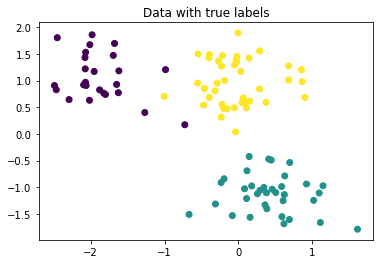

In [46]:
plt.scatter(X[:,0], X[:,1],c = labels)
plt.title('Data with true labels')
plt.show()

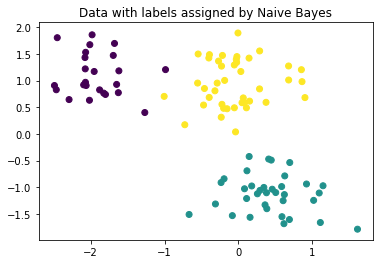

In [45]:
plt.scatter(X[:,0], X[:,1],c = NBassignedLabels)
plt.title('Data with labels assigned by Naive Bayes')

plt.show()

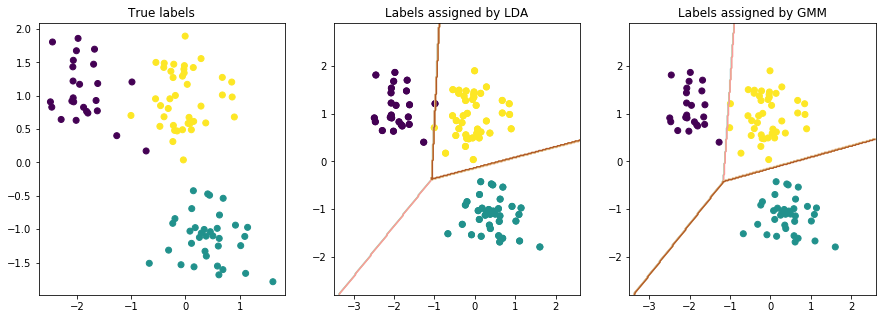

In [90]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(X[:,0], X[:,1],c = labels)
ax1.set_title('True labels')
ax2.scatter(X[:,0], X[:,1],c = NBassignedLabels)
ax2.scatter(X[:,0], X[:,1],c = NBassignedLabels)
ax2.contour(xx, yy, Z, cmap=plt.cm.Paired)
ax2.set_title('Labels assigned by LDA')
ax3.scatter(X[:,0], X[:,1],c = GMM.assignedLabels)
ax3.contour(xx, yy, ZGMM, cmap=plt.cm.Paired)
ax3.set_title('Labels assigned by GMM')

plt.show()

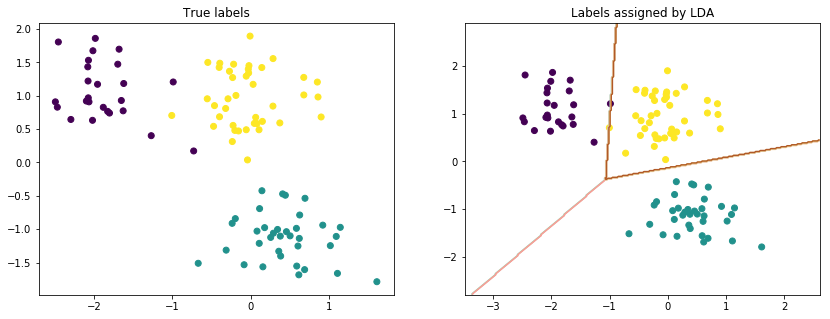

In [72]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.scatter(X[:,0], X[:,1],c = labels)
ax1.set_title('True labels')
ax2.scatter(X[:,0], X[:,1],c = NBassignedLabels)
ax2.contour(xx, yy, Z, cmap=plt.cm.Paired)
ax2.set_title('Labels assigned by LDA')

plt.show()